In [61]:
from IPython.lib.deepreload import original_import
%load_ext autoreload
%autoreload 2

import ex4
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
PADDING = 4
BORDER_CUT = 15
ENABLE_ROTATION = False
INCLUDE_EDGE_FULL_STRIP = False
num_of_blurs = 2

garden_video = "Garden.mp4"
house_video = "House.mp4"
kessaria_video = "Kessaria.mp4"
boat_video = "boat.mp4"
Shinkansen_video = "Shinkansen.mp4"
waterfalls_video = "Iguazu.mp4"

iphone_folder = "Exercise Inputs/iphone"
farm_video = "farm.MOV"
camels_video = "camels.MOV"
tomb_video = "tomb.MOV"
church1_video = "church1.MOV"
church2_video = "church2.MOV"

# 0. Load video & blur
cur_video = boat_video

raw_frames = ex4.load_video_frames(filename=cur_video, spatial_downscale=2)
# raw_frames = ex4.load_video_frames(filename=cur_video,
#  inputs_folder=iphone_folder, spatial_downscale=2)

for _ in range(num_of_blurs):
    raw_frames = ex4.blur_video(raw_frames, ex4.REDUCE_KERNEL)

In [90]:
# 1. & Compute Motion
motion_data = ex4.compute_motion(raw_frames, BORDER_CUT)
# print max value of theta in motion_data
best = -1
for _,_, theta in motion_data:
    best=max(best, np.abs(theta))
print("max angle found: ",best)

max angle found:  0.003799155574617542


In [64]:
# invert if motion is right-to-left
if ex4.estimate_motion_dir(motion_data) == "RTL":
    raw_frames = raw_frames[::-1]
    motion_data = [(-u, -v, -theta) for u, v, theta in motion_data[::-1]]

Left-to-Right motion detected.


In [65]:
# 2. Stabilize Video
stable_frames = ex4.stabilize_video(raw_frames, motion_data, enable_rotation=ENABLE_ROTATION)
stabilized_motion = [(u, 0, 0) for u, v, theta in motion_data]

In [66]:
# 3. Compute Path for motion composition: align all frames to same coordinate system
transforms = ex4.compute_cumulative_transforms(stabilized_motion)

In [67]:
geo = ex4.compute_canvas_geometry(transforms, raw_frames.shape[1],
                                          raw_frames.shape[2])

In [68]:
# pan = ex4.render_strip_panorama(stable_frames, transforms, geo, strip_anchor=0.5, strip_padding=PADDING, include_edge_full_strip=INCLUDE_EDGE_FULL_STRIP)
# plt.axis('off')
# plt.title("Panorama Mid Anchor - Without Stabilization")
# plt.imshow(pan)
# # save panorama with plt.imsave
# out_path = f"outputs/plots/{cur_video[:-4]}_unstable_panorama.png"
# plt.imsave(out_path, pan)
# print(f"{cur_video[:-4]} Panorama saved!")

In [69]:
# 4. Create Movie of Multi-Perspective mosaics
movie_frames = ex4.dynamic_mosaic(stable_frames, transforms, geo, num_views=20, back_n_forth=False, include_edge_full_strip=INCLUDE_EDGE_FULL_STRIP)

Creating panorama for anchor 0.20...
Creating panorama for anchor 0.23...
Creating panorama for anchor 0.26...
Creating panorama for anchor 0.29...
Creating panorama for anchor 0.33...
Creating panorama for anchor 0.36...
Creating panorama for anchor 0.39...
Creating panorama for anchor 0.42...
Creating panorama for anchor 0.45...
Creating panorama for anchor 0.48...
Creating panorama for anchor 0.52...
Creating panorama for anchor 0.55...
Creating panorama for anchor 0.58...
Creating panorama for anchor 0.61...
Creating panorama for anchor 0.64...
Creating panorama for anchor 0.67...
Creating panorama for anchor 0.71...
Creating panorama for anchor 0.74...
Creating panorama for anchor 0.77...
Creating panorama for anchor 0.80...


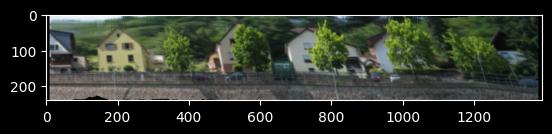

In [70]:
plt.imshow(movie_frames[len(movie_frames)//2])

In [71]:
import imageio

imageio.mimsave(f"outputs/movies/{cur_video[:-4]}_movie.mp4", movie_frames,
                fps=10)
print(f"{cur_video[:-4]} Movie saved!")

boat Movie saved!


### for debugging: render 3 panoramas with different anchors and show them

In [72]:
# 3. Render
panorama_left = ex4.render_strip_panorama(stable_frames, transforms, geo, strip_anchor=0.2, strip_padding=PADDING, include_edge_full_strip=INCLUDE_EDGE_FULL_STRIP)
print("Panorama Left Anchor 0.2 done.")
panorama_mid = ex4.render_strip_panorama(stable_frames, transforms, geo, strip_anchor=0.5, strip_padding=PADDING, include_edge_full_strip=INCLUDE_EDGE_FULL_STRIP)
print("Panorama Mid Anchor 0.5 done.")
panorama_right = ex4.render_strip_panorama(stable_frames, transforms, geo, strip_anchor=0.8, strip_padding=PADDING, include_edge_full_strip=INCLUDE_EDGE_FULL_STRIP)
print("Panorama Right Anchor 0.8 done.")
print(">>> done.")

Panorama Left Anchor 0.2 done.
Panorama Mid Anchor 0.5 done.
Panorama Right Anchor 0.8 done.
>>> done.


initializing plot...


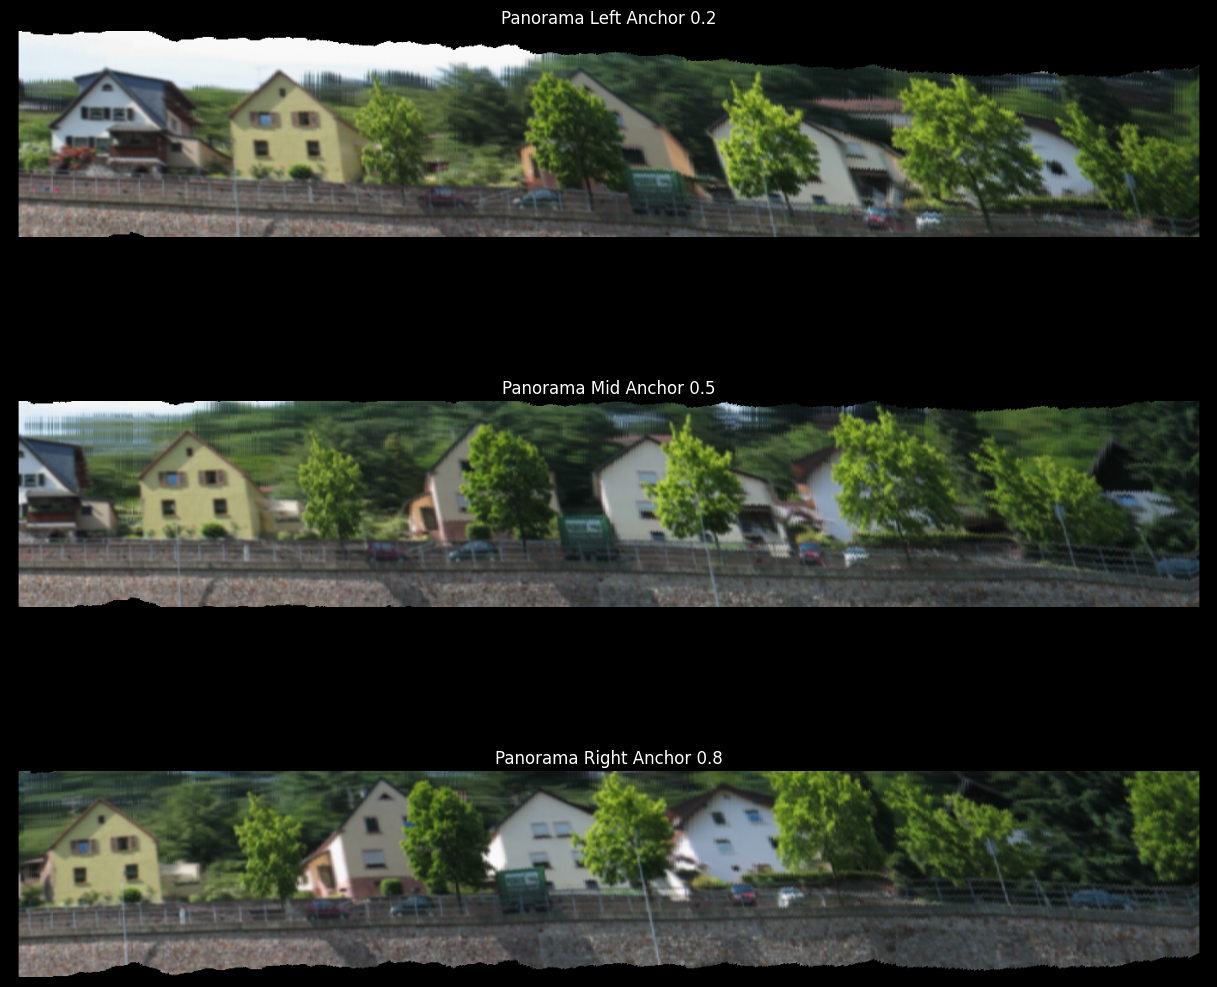

plot done.


In [73]:
# show all 3 panoramas one line below the other
# with tight layout, no vertical padding between lines
print("initializing plot...")
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.imshow(panorama_left)
plt.title("Panorama Left Anchor 0.2")
plt.axis('off')
plt.subplot(3, 1, 2)
plt.imshow(panorama_mid)
plt.title("Panorama Mid Anchor 0.5")
plt.axis('off')
plt.subplot(3, 1, 3)
plt.imshow(panorama_right)
plt.title("Panorama Right Anchor 0.8")
plt.axis('off')
plt.tight_layout(pad=0.1)
plt.show()
print("plot done.")

In [74]:
import os
# import matplotlib.pyplot as plt

os.makedirs("outputs/plots", exist_ok=True)

print("initializing plot...")
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(3, 1, 1)
ax1.imshow(panorama_left)
ax1.set_title("Panorama Left Anchor 0.2")
ax1.axis("off")

ax2 = fig.add_subplot(3, 1, 2)
ax2.imshow(panorama_mid)
ax2.set_title("Panorama Mid Anchor 0.5")
ax2.axis("off")

ax3 = fig.add_subplot(3, 1, 3)
ax3.imshow(panorama_right)
ax3.set_title("Panorama Right Anchor 0.8")
ax3.axis("off")

fig.tight_layout(pad=0.0)

out_path = f"outputs/plots/{cur_video[:-4]}_panoramas.png"
fig.savefig(out_path, dpi=200, bbox_inches="tight")
plt.close(fig)

print(f"saved: {out_path}")

initializing plot...
saved: outputs/plots/boat_panoramas.png


In [75]:
# create and save a plot of first, middle and last frames of INPUT video. show them side by side on same row.
n = len(raw_frames)
idxs = [0, n // 2, n - 1]
frames = [raw_frames[i] for i in idxs]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ["First frame", "Middle frame", "Last frame"]

for ax, frame, title in zip(axes, frames, titles):
    ax.imshow(frame)
    ax.set_title(title)
    ax.axis("off")

fig.tight_layout(pad=0.0)

out_path = f"outputs/plots/{cur_video[:-4]}_input_frames_1st_mid_last.png"
fig.savefig(out_path, dpi=200, bbox_inches="tight")
plt.close(fig)

print(f"saved: {out_path}")

saved: outputs/plots/boat_input_frames_1st_mid_last.png


In [76]:
# create and save a plot of first, middle and last frames of INPUT video. show them side by side on same row.
n = len(raw_frames)
idxs = [0, n // 2, n - 1]
# frames = [raw_frames[i] for i in idxs]
frames = [panorama_left, panorama_mid, panorama_right]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ["Panorama Left Anchor 0.2", "Panorama Middle Anchor 0.5", "Panorama Right Anchor 0.8"]

for ax, frame, title in zip(axes, frames, titles):
    ax.imshow(frame)
    ax.set_title(title)
    ax.axis("off")

fig.tight_layout(pad=0.5)

out_path = f"outputs/plots/{cur_video[:-4]}_3_panoramas.png"
fig.savefig(out_path, dpi=200, bbox_inches="tight")
plt.close(fig)

print(f"saved: {out_path}")

saved: outputs/plots/boat_3_panoramas.png


In [77]:
# Before stabilization (raw input)
raw0 = raw_frames[0]
raw1 = raw_frames[1]

# After stabilization (note: stable_frames aligns content; frame[0] is typically unchanged)
stab0 = stable_frames[0]
stab1 = stable_frames[1]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(raw0)
axes[0, 0].set_title("Input: frame 0 (before)")
axes[0, 0].axis("off")

axes[0, 1].imshow(raw1)
axes[0, 1].set_title("Input: frame 1 (before)")
axes[0, 1].axis("off")

axes[1, 0].imshow(stab0)
axes[1, 0].set_title("Stabilized: frame 0 (after)")
axes[1, 0].axis("off")

axes[1, 1].imshow(stab1)
axes[1, 1].set_title("Stabilized: frame 1 (after)")
axes[1, 1].axis("off")

fig.tight_layout(pad=0.2)

out_path = f"outputs/plots/{cur_video[:-4]}_stabilization_frame0_vs_frame1.png"
fig.savefig(out_path, dpi=200, bbox_inches="tight")
plt.close(fig)

print(f"saved: {out_path}")

saved: outputs/plots/boat_stabilization_frame0_vs_frame1.png


In [78]:
# import os
# import numpy as np
# from matplotlib.figure import Figure
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
#
# # uses your project warp (SciPy map_coordinates), so no cv2 dependency
# from ex4 import warp_image  # adjust import if needed
#
# os.makedirs("outputs/plots", exist_ok=True)
#
# # frames are float64 in [0, 1] in your pipeline
# f0 = raw_frames[0]
# f1 = raw_frames[1]
#
# # motion_data[0] corresponds to motion from frame0 -> frame1
# u, v, theta = motion_data[0]
#
# # warp frame1 into frame0 coordinate system
# f1_warp = warp_image(f1, u, v, theta)
#
# alpha = 0.5
# overlay = np.clip(alpha * f0 + (1.0 - alpha) * f1_warp, 0.0, 1.0)
#
# # save overlay without pyplot
# fig = Figure(figsize=(8, 6), dpi=200)
# FigureCanvas(fig)
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(overlay)
# ax.set_title("Overlay: frame0 + warped(frame1)")
# ax.axis("off")
# fig.tight_layout(pad=0.2)
#
# out_path = f"outputs/plots/{cur_video[:-4]}_overlay_frame0_frame1_warped.png"
# fig.savefig(out_path, bbox_inches="tight")
# print(f"saved: {out_path}")

In [79]:
import os
import numpy as np
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import ex4  # uses ex4.warp_image

os.makedirs("outputs/plots", exist_ok=True)

# --- pick frames (0-based indexing) ---
i_ref = 85   # frame 1
i_tgt = i_ref+1   # frame 10

f_ref = raw_frames[i_ref]
f_tgt = raw_frames[i_tgt]

# motion_data[k] = (u,v,theta) aligns frame(k+1) to frame(k) in LK,
# but in this project it's used as per-step motion between consecutive frames.
# Compose steps i_ref -> i_tgt by summing translations and rotations (small-angle model).
u_cum = 0.0
v_cum = 0.0
theta_cum = 0.0
for k in range(i_ref, i_tgt):
    du, dv, dtheta = motion_data[k]
    u_cum += du
    v_cum += dv
    theta_cum += dtheta

# Warp target frame into reference frame coordinates
f_tgt_warp = ex4.warp_image(f_tgt, u_cum, v_cum, theta_cum)

alpha = 0.5
overlay = np.clip(alpha * f_ref + (1.0 - alpha) * f_tgt_warp, 0.0, 1.0)

# Save without pyplot (avoids pyplot state issues)
fig = Figure(figsize=(8, 6), dpi=200)
FigureCanvas(fig)
ax = fig.add_subplot(1, 1, 1)
ax.imshow(overlay)
ax.set_title(f"Overlay: frame {i_ref+1} + warped(frame {i_tgt+1})\\n(u={u_cum:.2f}, v={v_cum:.2f}, θ={theta_cum:.4f})")
ax.axis("off")
fig.tight_layout(pad=0.2)

out_path = f"outputs/plots/{cur_video[:-4]}_overlay_frame{i_ref+1:02d}_frame{i_tgt+1:02d}_cumulative.png"
fig.savefig(out_path, bbox_inches="tight")
print(f"saved: {out_path}")

saved: outputs/plots/boat_overlay_frame86_frame87_cumulative.png


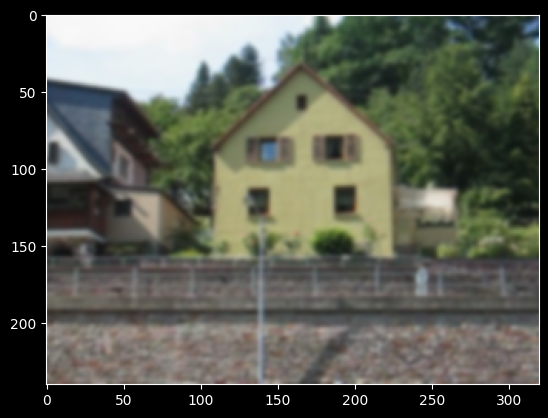

In [80]:
plt.imshow(raw_frames[i_ref])